# 📊 SyriaTel Customer Churn Prediction

Welcome to this end-to-end data science project focused on customer churn prediction for **SyriaTel**, a telecommunications company.

## 🧠 Problem Understanding

**Business Objective:**  
SyriaTel wants to proactively identify customers likely to **churn** (stop using their services), so they can intervene and reduce revenue loss.

**Technical Objective:**  
This is a binary classification task — I aim to train a model that accurately predicts whether a customer will churn based on historical data.




In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_classif

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

All the necessary Python libraries for data manipulation, visualization, and machine learning have been imported at the start. Their usage will become clear as we move through each stage of the pipeline.


## 📥 Data Loading and Initial Exploration

Before diving into preprocessing or modeling, we start by loading the dataset and gaining an initial understanding of its structure.

Key steps in this section:
- Load the data from a CSV file
- Inspect the dataset shape and column types
- Preview the first few rows
- Check for any missing values
- Generate basic descriptive statistics


In [2]:
# Load the dataset
df = pd.read_csv('Data/telecom.csv')

In [3]:
df.shape

(3333, 21)

The dataset contains `3,333 rows` and `21 columns`, which indicates a medium-sized dataset suitable for detailed analysis and modeling.


In [4]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

We observe:
- Most features are numerical, with a few categorical ones (`state`, `international plan`, `voice mail plan`, etc.).
- The target variable is `churn`, stored as a boolean.
- `phone number` and `state` may not be useful for prediction and could be dropped later.


In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Looking at the first five rows gives us a glimpse of how the data is structured. We can already spot columns like `total day minutes`, `total intl charge`, and `customer service calls` which may be predictive of churn.


In [6]:
df.isnull().sum()  

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are **no missing values** in the dataset. This saves us the effort of imputing or removing records at this stage.


In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Descriptive statistics reveal:
- `account length` ranges from 1 to 243 days.
- `customer service calls` varies from 0 to 9, which might indicate dissatisfaction.
- Call and charge distributions vary across time periods (day, evening, night, international), and some values are skewed (e.g., `total intl calls` has a low mean).

These insights help us begin feature selection and transformation decisions in upcoming steps.


## 🎯 Target Variable Analysis

Understanding the distribution of our target variable (`churn`) is crucial for:

- Identifying class imbalance  
- Setting appropriate evaluation metrics  
- Understanding the business context  


In [8]:
target_col = 'churn'
churn_counts = df[target_col].value_counts()
churn_counts

churn
False    2850
True      483
Name: count, dtype: int64

In [9]:
churn_percentages = df[target_col].value_counts(normalize=True) * 100
churn_percentages

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

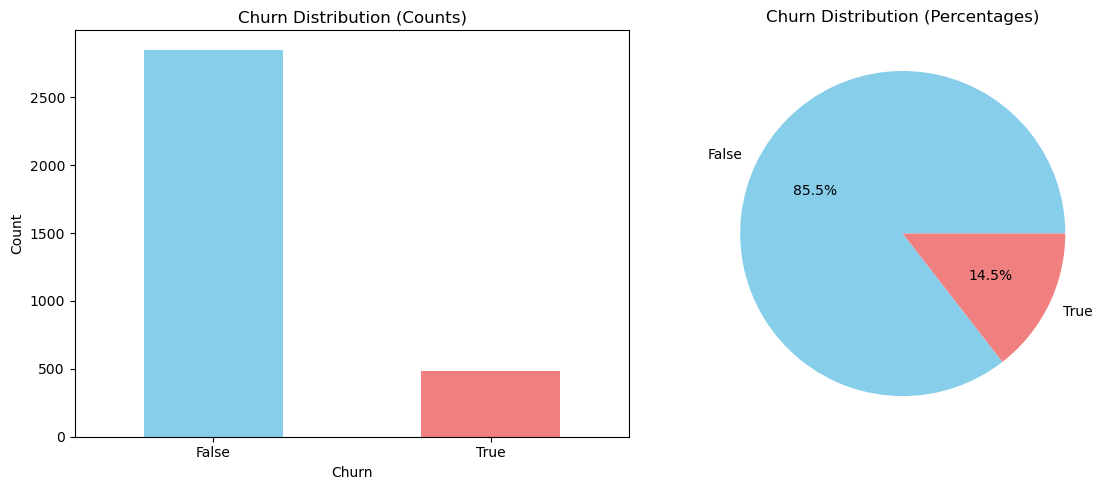

In [10]:
# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Churn Distribution (Counts)')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(churn_percentages.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'])
ax2.set_title('Churn Distribution (Percentages)')

plt.tight_layout()
plt.show()


The minority class (churned customers) makes up only 14.5% of the data, indicating class imbalance. To address this, techniques like `SMOTE`, `class weighting`, or `focused evaluation` metrics should be considered.

## 🔍 Exploratory Data Analysis

In this section, we examine the relationships between features and the target variable to:
- Uncover patterns in customer behavior  
- Identify potential predictors of churn  
- Derive actionable business insights

In [11]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [12]:
# Remove target from feature lists if present
if target_col in numerical_features:
    numerical_features.remove(target_col)
if target_col in categorical_features:
    categorical_features.remove(target_col)
    
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

Numerical features (16): ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Categorical features (4): ['state', 'phone number', 'international plan', 'voice mail plan']


We identified 16 numerical and 4 categorical features (excluding the target). Next, we'll analyze correlations among numerical features and explore the impact of categorical features on churn.


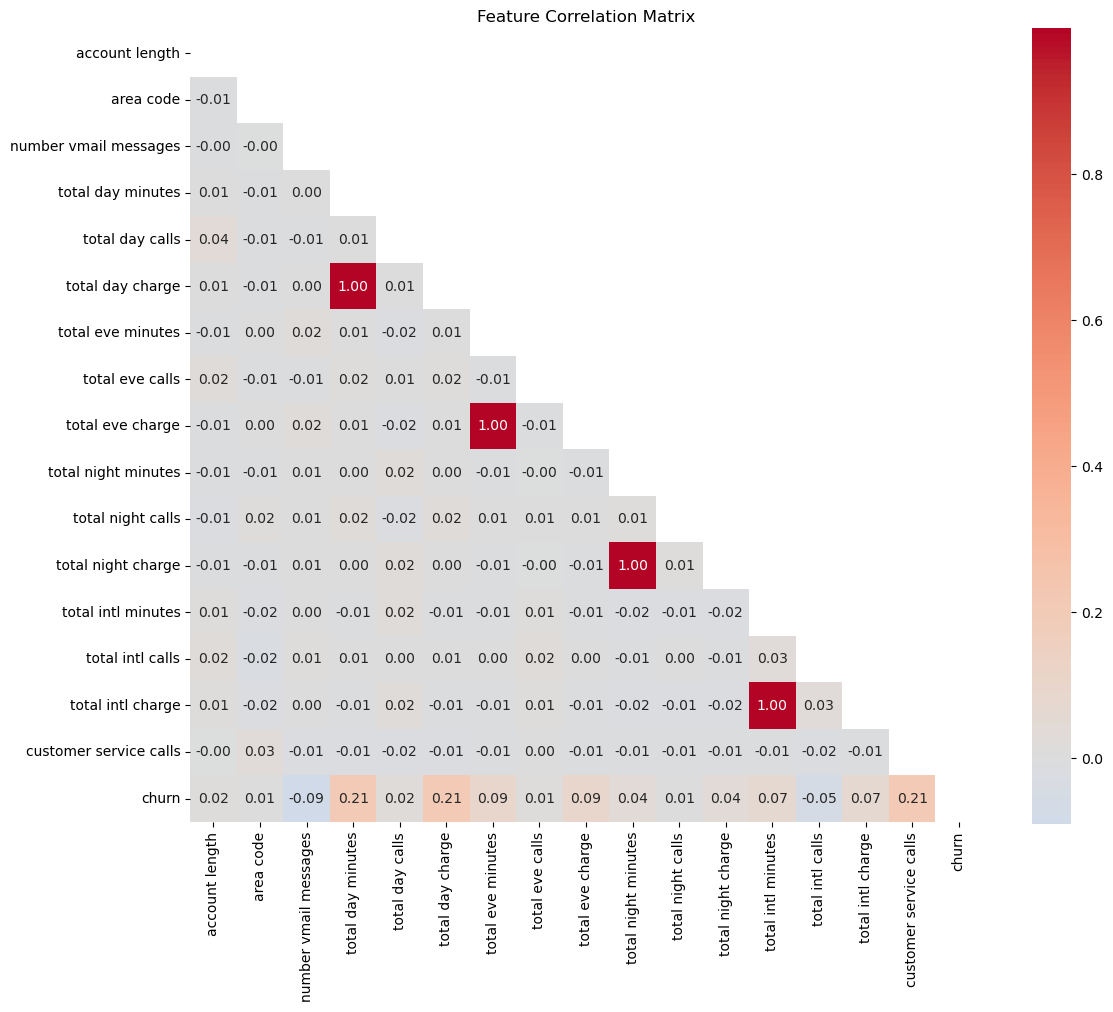

In [13]:
# Correlation analysis for numerical features
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + [target_col]].corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

- `Customer service calls`, `total day charge`, and `total day minutes` show the strongest (though still moderate) positive correlation with churn (~0.21).
- `Number vmail messages` is negatively correlated with churn, but the relationship is weak.
- Most features exhibit very low correlation with churn, suggesting limited linear influence individually.
- Strong internal correlations (e.g., between minutes and charges) are expected due to pricing structure.

In [14]:
# Features most correlated with target
target_correlations = correlation_matrix[target_col].abs().sort_values(ascending=False)
print(f"\nFeatures most correlated with {target_col}:")
print(target_correlations[1:6])  # Exclude self-correlation


Features most correlated with churn:
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
Name: churn, dtype: float64


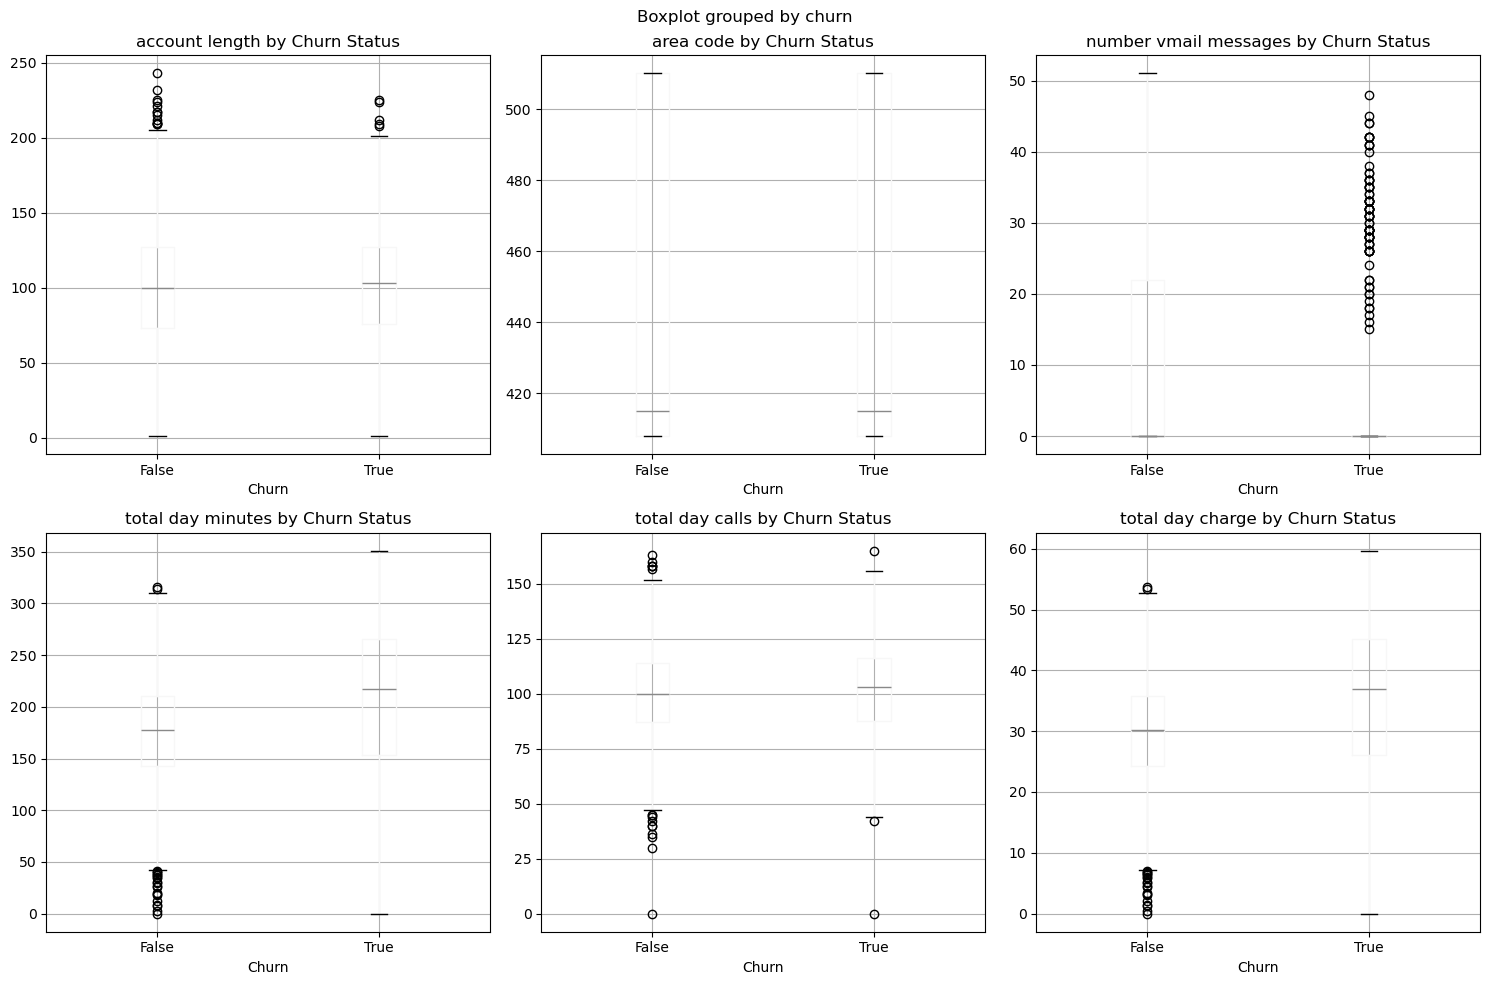

In [15]:
# Distribution analysis for key numerical features
# Select top 6 numerical features for visualization
features_to_plot = numerical_features[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    if i < len(axes):
        # Box plot for each feature by churn status
        df.boxplot(column=feature, by=target_col, ax=axes[i])
        axes[i].set_title(f'{feature} by Churn Status')
        axes[i].set_xlabel('Churn')

# Hide empty subplots
for i in range(len(features_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

- `Account Length`: There is no significant difference in account length between churned and non-churned users, indicating it may not be a strong predictor of churn.
- `Area Code`: This feature shows minimal variation across churn status and is likely not informative for churn prediction.
- `Number of Voicemail Messages`: Customers who churn tend to have fewer voicemail messages. Non-churned customers exhibit a wider range and higher median voicemail counts, suggesting this feature could be useful.
- `Total Day Minutes & Total Day Charge`: Both show higher median values for churned customers, indicating that those who use more call time (and incur higher charges) are more likely to churn.
- `Total Day Calls`: This feature appears fairly uniform between both groups, implying limited predictive power.

These exploratory insights suggest that usage-based features like total minutes and charges may be more relevant for predicting churn than static attributes like account length or area code.


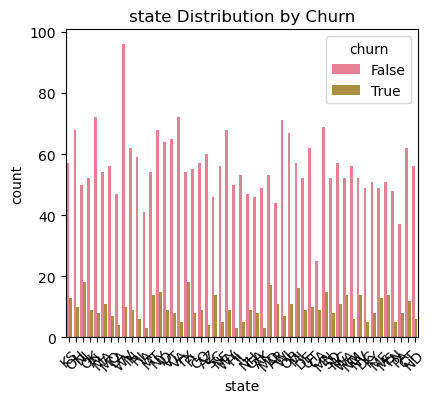

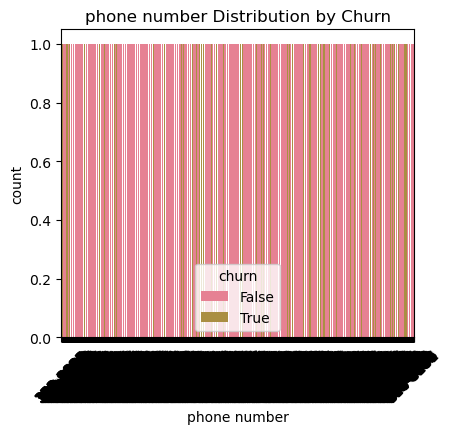

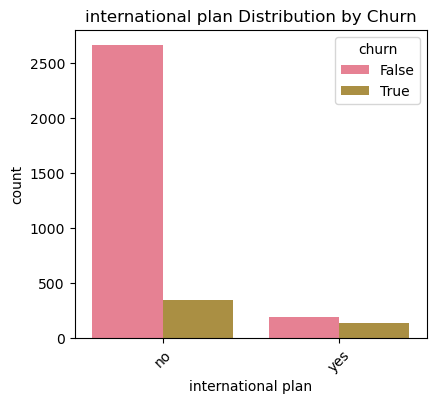

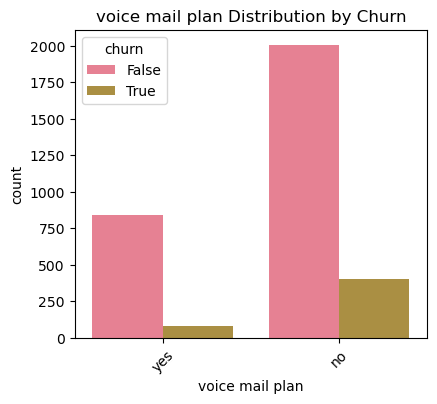

In [16]:
# Categorical features analysis
for feature in categorical_features[:4]:  # Analyze first 4 categorical features
    # Visualization
    plt.figure(figsize=(10, 4))
    
    # Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=feature, hue=target_col)
    plt.title(f'{feature} Distribution by Churn')
    plt.xticks(rotation=45)
    
    plt.show()

`Note:` x-axis formatting is not be optimal for the first two visualizations as we are primarily focused on exploratory data understanding at this stage.
Here are the comprehensive takeaways from our feature exploration:

- **State**: While the overall churn rate appears relatively consistent across states, the distribution reveals more nuanced patterns than initially apparent. Several states show notably higher churn volumes in absolute terms, with a few states displaying higher absolute numbers of churned customers, even if their proportional churn rates aren't dramatically different. The variation is more pronounced than a completely uniform distribution would suggest, indicating that *state* may have some predictive value in modeling, particularly for identifying high-volume churn locations.

- **Phone Number**: Since phone numbers are unique identifiers, each value only appears once in the dataset. This results in a uniform distribution with each count equal to 1. As expected, this feature offers no predictive value and should be excluded from modeling.

- **International Plan**: Customers without international plans (`No`) represent the vast majority of the dataset (~2,700 customers), with most being retained customers. However, among the smaller group with international plans (`Yes`), there appears to be a notably higher proportion of churned customers relative to the plan's adoption rate. This suggests that *international plan* enrollment may be associated with higher churn risk.

- **Voice Mail Plan**: The distribution shows that customers without voice mail plans (`No`) make up the larger segment (~2,000+ customers), but interestingly, customers with voice mail plans (`Yes`) show a different churn pattern. The voice mail plan group appears to have a relatively lower churn rate, suggesting that *voice mail plan* adoption might be associated with customer retention.

The service plan features (international and voice mail) demonstrate clear distributional differences by churn status, making them valuable candidates for our predictive model.

## 🛠️ Feature Engineering & Preprocessing

We will engineer features to better represent customer behavior (e.g., average call duration, total usage) and encode categorical variables for compatibility with machine learning models. This step is crucial to enhance predictive power and ensure the data is ready for modeling.


In [17]:
# Create a copy for preprocessing
df_processed = df.copy()

In [18]:
df_processed['avg call duration day'] = df_processed['total day minutes'] / df_processed['total day calls']
df_processed['avg call duration day'] = df_processed['avg call duration day'].fillna(0)
df_processed.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg call duration day
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,2.410000
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1.313821
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,2.135088
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,4.216901
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1.475221


Engineered a new feature representing average daytime call duration to capture individual call behavior and usage intensity.

In [19]:
# Create total usage features for individual time period features 
time_periods = ['day', 'eve', 'night', 'intl']
for metric in ['minutes', 'calls', 'charge']:
    total_cols = [col for col in df_processed.columns if any(f'total {period} {metric}' in col for period in time_periods)]
    if len(total_cols) > 1:
        df_processed[f'total {metric}'] = df_processed[total_cols].sum(axis=1)
df_processed.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg call duration day,total minutes,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False,2.410000,717.2,303,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False,1.313821,625.2,332,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False,2.135088,539.4,333,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False,4.216901,564.8,255,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False,1.475221,512.0,359,52.09


Constructed total usage features by aggregating minutes, calls, and charges across day, evening, night, and international periods to capture overall customer activity patterns.


In [20]:
# Handle categorical variables
categorical_features = df_processed.select_dtypes(include=['object', 'bool']).columns.tolist()
if target_col in categorical_features:
    categorical_features.remove(target_col)

In [21]:
# Label encode categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature] = le.fit_transform(df_processed[feature].astype(str))
    label_encoders[feature] = le
    print(f"Encoded {feature}: {le.classes_}")

Encoded state: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Encoded phone number: ['327-1058' '327-1319' '327-3053' ... '422-8333' '422-8344' '422-9964']
Encoded international plan: ['no' 'yes']
Encoded voice mail plan: ['no' 'yes']


In [22]:
# Handle target variable if it's categorical
target_encoder = LabelEncoder()
df_processed[target_col] = target_encoder.fit_transform(df_processed[target_col])
print(f"Target variable encoded: {target_encoder.classes_}")

Target variable encoded: [False  True]


Completed feature engineering by creating meaningful derived variables and encoding categorical data to prepare the dataset for modeling. These transformations help capture customer behavior more effectively and ensure compatibility with machine learning algorithms.

## ✅ Feature Selection

Now we will move onto identify the most relevant features for predicting customer churn. By selecting the most informative variables, we reduce noise, improve model performance, and gain clearer insights into which factors drive churn.


In [ ]:
# Prepare features and target
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

We use `SelectKBest` with the ANOVA F-test (`f_classif`) to rank features based on their statistical relationship with the target variable. This method selects the top 15 features with the strongest correlation to churn, helping us retain only the most relevant predictors.

In [24]:
# Statistical feature selection
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
feature_scores = selector.scores_[selector.get_support()]

print(f"Selected {len(selected_features)} features:")
for feature, score in zip(selected_features, feature_scores):
    print(f"  {feature}: {score:.2f}")

Selected 15 features:
  international plan: 241.21
  voice mail plan: 35.12
  number vmail messages: 27.04
  total day minutes: 146.35
  total day charge: 146.35
  total eve minutes: 28.93
  total eve charge: 28.93
  total night charge: 4.20
  total intl minutes: 15.58
  total intl calls: 9.33
  total intl charge: 15.59
  customer service calls: 151.77
  avg call duration day: 78.82
  total minutes: 136.79
  total charge: 188.71


In [ ]:
# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance_score': feature_scores
}).sort_values('importance_score', ascending=False)

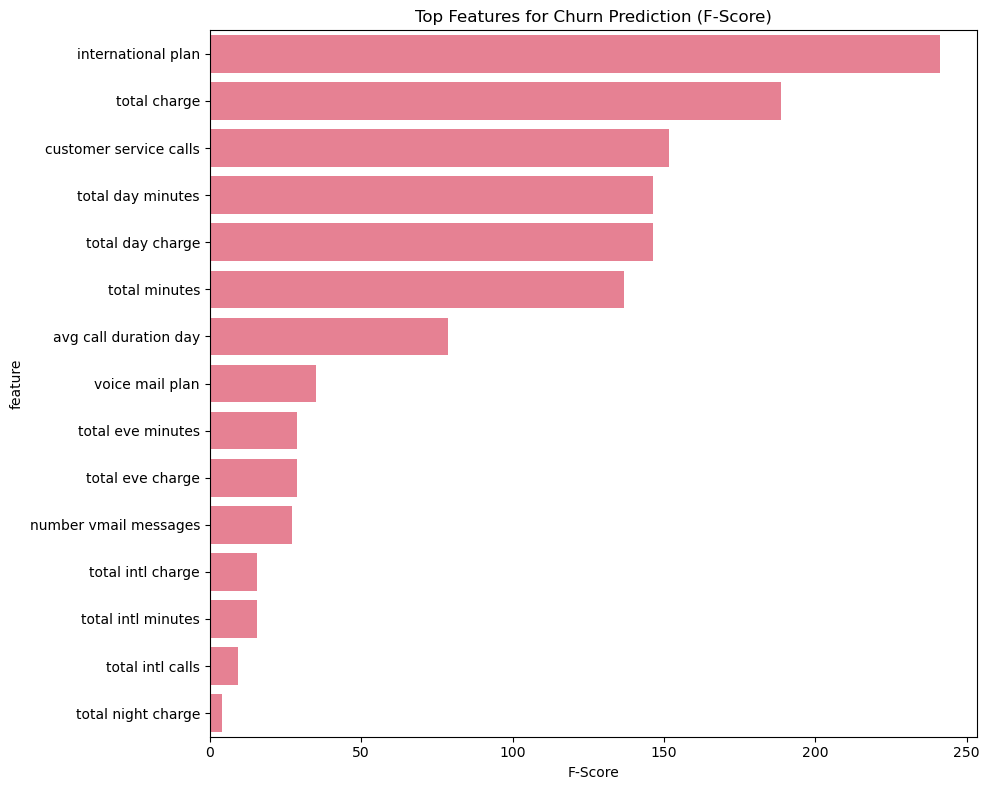

In [26]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='importance_score', y='feature')
plt.title('Top Features for Churn Prediction (F-Score)')
plt.xlabel('F-Score')
plt.tight_layout()
plt.show()


*Top Predictors:* International plan dominates as the strongest predictor (F-Score ~240), followed by total charge (~190) and customer service calls (~150). This confirms our earlier finding that international plan customers are at higher churn risk, while also highlighting that billing amounts and service interactions are critical churn indicators.

*Moderate Predictors:* Day-time usage features (total day minutes/charge) and overall usage patterns show solid predictive value, along with average call duration.

*Lower Impact:* Evening, night, and international usage metrics contribute minimally, likely due to lower usage volumes in these categories.

The results validate our categorical analysis and suggest that service plan enrollment, billing patterns, and customer service interactions are the primary drivers of churn behavior in this dataset.

In [27]:
# Update X to use selected features
X = X[selected_features]

## ✂️⚖️ Data Splitting and Scaling
Before training our machine learning models, we need to properly prepare our dataset by splitting it into training and testing sets, and standardizing the feature scales. This ensures unbiased model evaluation and optimal performance across algorithms that are sensitive to feature magnitudes.
We'll use an 80-20 train-test split with stratification to maintain consistent churn rates across both sets, and apply StandardScaler to normalize our features.

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set churn rate: {y_train.mean():.2%}")
print(f"Test set churn rate: {y_test.mean():.2%}")

Training set size: 2666 samples
Test set size: 667 samples
Training set churn rate: 14.48%
Test set churn rate: 14.54%


In [33]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 Model Training and Evaluation

We'll train and compare four different machine learning algorithms to identify the best approach for predicting customer churn. Each model uses a different algorithmic approach, providing diverse perspectives on the underlying patterns in our data.

`Logistic Regression`: A linear model that uses the logistic function to model the probability of binary outcomes. It assumes a linear relationship between features and the log-odds of churn, making it highly interpretable and efficient. We use scaled features for this model as it's sensitive to feature magnitudes.

`Random Forest`: An ensemble method that builds multiple decision trees and averages their predictions. It reduces overfitting through bootstrap aggregating (bagging) and random feature selection at each split. This approach handles feature interactions well and provides robust performance across different data types.

`Gradient Boosting`: A sequential ensemble method that builds trees iteratively, where each new tree corrects the errors of previous trees. It typically achieves high predictive accuracy by focusing on difficult-to-predict cases, though it can be prone to overfitting without proper regularization.

`Decision Tree`: A single tree-based model that creates a flowchart-like structure of if-else conditions to make predictions. While highly interpretable and capable of capturing non-linear relationships, individual trees can overfit easily, making them less robust than ensemble methods.

We will use 5-fold stratified cross-validation to ensure robust performance estimates while maintaining consistent churn rates across folds. All models (except tree-based ones) will use balanced class weights to handle the class imbalance in our churn dataset. Performance will be evaluated using multiple metrics including ROC-AUC, precision, recall, and F1-score to provide a comprehensive view of model effectiveness.

In [ ]:
# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced')
}

In [ ]:
# Store results
model_results = {}
trained_models = {}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression only
    if name in ['Logistic Regression']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=cv, scoring='roc_auc')
    
    # Train on full training set
    model.fit(X_train_model, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    model_results[name] = {
        'CV_ROC_AUC_Mean': cv_scores.mean(),
        'CV_ROC_AUC_Std': cv_scores.std(),
        'Test_Accuracy': accuracy,
        'Test_Precision': precision,
        'Test_Recall': recall,
        'Test_F1': f1,
        'Test_ROC_AUC': roc_auc
    }
    
    trained_models[name] = model
    
    print(f"  CV ROC-AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")
    print(f"  Test ROC-AUC: {roc_auc:.3f}")
    print(f"  Test Accuracy: {accuracy:.3f}")
    print(f"  Test Precision: {precision:.3f}")
    print(f"  Test Recall: {recall:.3f}")
    print(f"  Test F1-Score: {f1:.3f}")

# Create results comparison dataframe
results_df = pd.DataFrame(model_results).T
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_df.round(3))

MODEL TRAINING AND EVALUATION

Training Logistic Regression...
  CV ROC-AUC: 0.821 (+/- 0.022)
  Test ROC-AUC: 0.819
  Test Accuracy: 0.754
  Test Precision: 0.341
  Test Recall: 0.742
  Test F1-Score: 0.468

Training Random Forest...
  CV ROC-AUC: 0.926 (+/- 0.030)
  Test ROC-AUC: 0.922
  Test Accuracy: 0.961
  Test Precision: 1.000
  Test Recall: 0.732
  Test F1-Score: 0.845

Training Gradient Boosting...
  CV ROC-AUC: 0.931 (+/- 0.034)
  Test ROC-AUC: 0.921
  Test Accuracy: 0.973
  Test Precision: 1.000
  Test Recall: 0.814
  Test F1-Score: 0.898

Training Decision Tree...
  CV ROC-AUC: 0.915 (+/- 0.034)
  Test ROC-AUC: 0.882
  Test Accuracy: 0.945
  Test Precision: 0.819
  Test Recall: 0.794
  Test F1-Score: 0.806

MODEL COMPARISON SUMMARY
                     CV_ROC_AUC_Mean  CV_ROC_AUC_Std  Test_Accuracy  \
Logistic Regression            0.821           0.011          0.754   
Random Forest                  0.926           0.015          0.961   
Gradient Boosting              0.

#### Initial Model Performance Analysis

##### *Technical Performance Summary*

All models demonstrate reasonably high cross-validation ROC-AUC scores, indicating good discriminative ability between churners and non-churners, with ensemble methods (Random Forest: 0.926, Gradient Boosting: 0.931, Decision Tree: 0.915) significantly outperforming Logistic Regression (0.821). However, **Gradient Boosting** emerges as the top performer with the highest cross-validation ROC-AUC (0.931) and excellent test metrics including perfect precision (1.000) and strong recall (0.814). **Random Forest** follows closely with comparable ROC-AUC (0.926) but slightly lower recall (0.732). **Logistic Regression** shows the weakest performance across all metrics, particularly in precision (0.341). **Decision Tree** provides moderate performance but exhibits signs of overfitting with a notable gap between CV and test ROC-AUC scores.

The ensemble methods (Random Forest and Gradient Boosting) achieve perfect precision, meaning they produce zero false positives - every customer they predict to churn actually does churn. However, their recall varies, with Gradient Boosting capturing 81.4% of actual churners versus Random Forest's 73.2%.

##### *Business Impact Interpretation*

**Optimal Resource Allocation:** Gradient Boosting's perfect precision (100%) ensures zero wasted investment on retention campaigns - every customer flagged for intervention will actually churn without action. This eliminates false positives entirely, allowing marketing budgets to be deployed with complete confidence and maximizing return on retention spending.

**Revenue Protection Coverage:** With 81.4% recall, the model captures over 4 out of 5 customers who will churn, providing substantial coverage for proactive revenue protection. While 19% of churners may be missed, the perfect targeting accuracy of identified cases makes this an acceptable trade-off for most business contexts.

**Operational Excellence:** The model's 97.3% accuracy and consistent cross-validation performance (ROC-AUC 0.931 ± 0.017) provide reliable, stable predictions for strategic planning. Retention teams can act decisively on model outputs without second-guessing, streamlining operational workflows and enabling confident resource allocation decisions.

**Recommendation:** Deploy Gradient Boosting as the primary churn prediction model, focusing retention efforts exclusively on its high-confidence predictions while implementing monitoring systems to track the minority of churners that may be missed.

## 📈 Model Performance Visualization

To make an informed decision about our final model selection, we'll create comprehensive visualizations that compare the performance of all four models across key metrics. These visual comparisons will help us understand the trade-offs between different models and validate our choice of the best-performing algorithm for churn prediction.

The visualizations include ROC-AUC comparisons, precision-recall relationships, F1-score rankings, and cross-validation stability analysis to provide a complete picture of model performance.

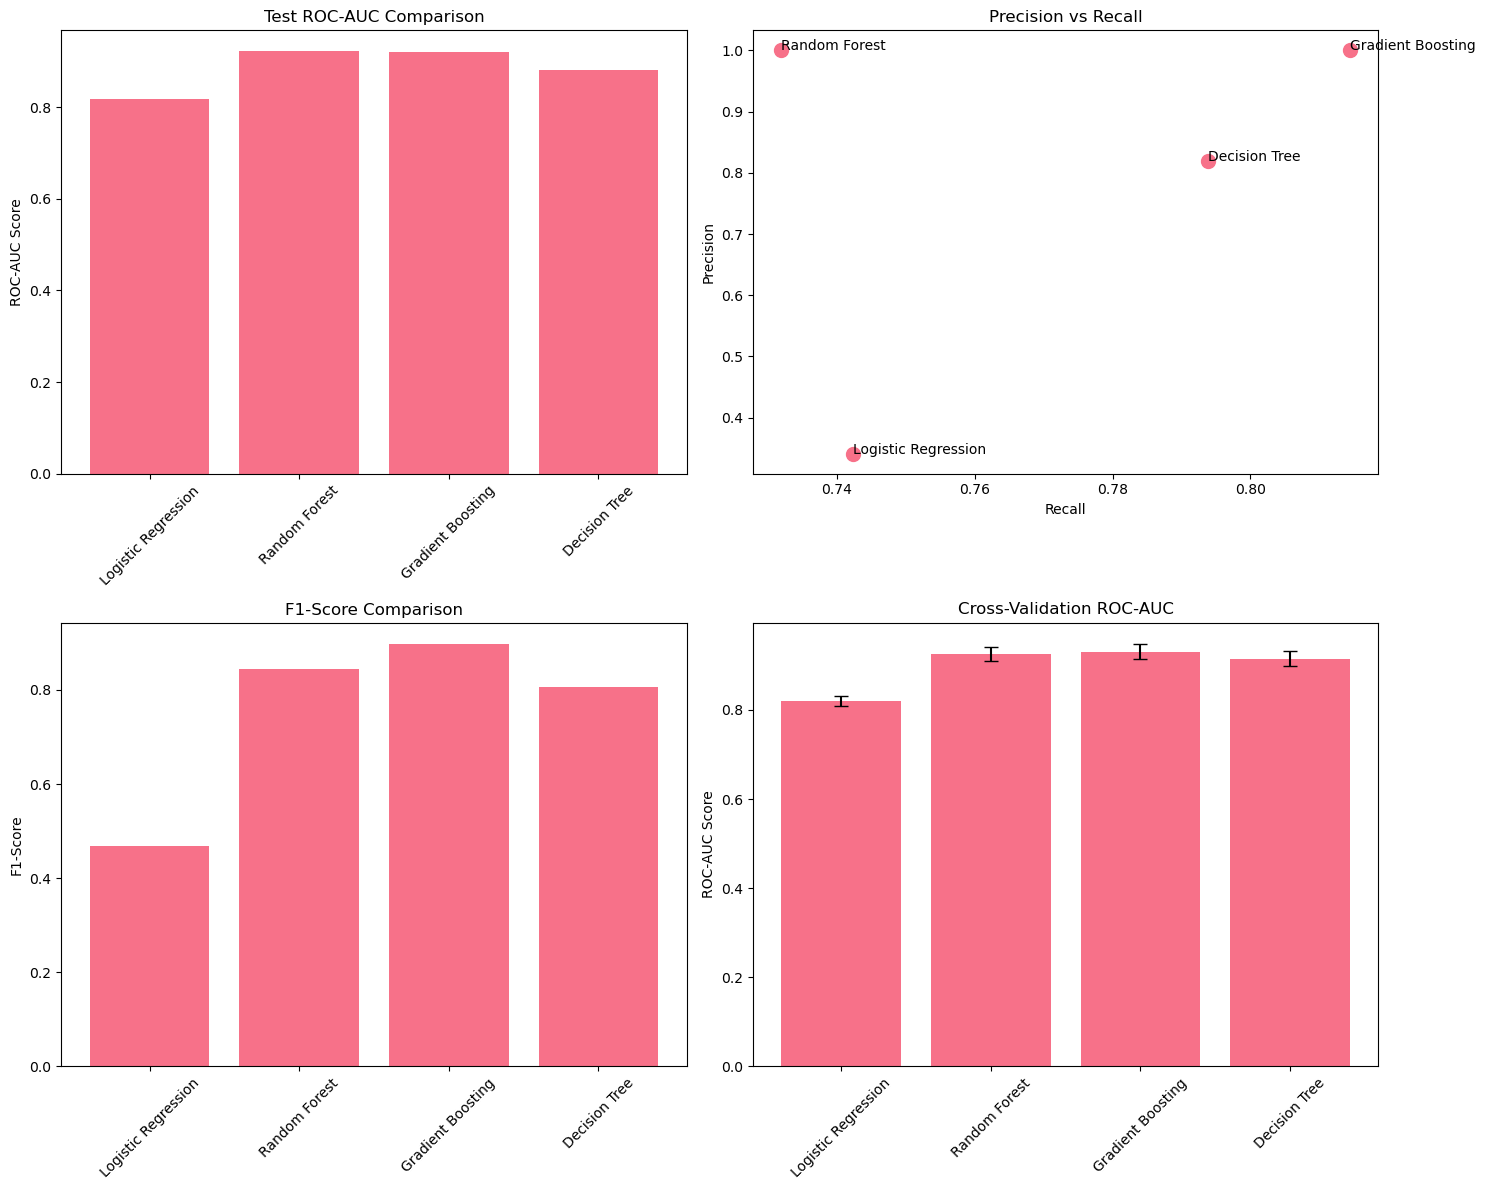


Best model based on Test ROC-AUC: Random Forest with ROC-AUC 0.922


In [ ]:
# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ROC-AUC comparison
axes[0, 0].bar(results_df.index, results_df['Test_ROC_AUC'])
axes[0, 0].set_title('Test ROC-AUC Comparison')
axes[0, 0].set_ylabel('ROC-AUC Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[0, 1].scatter(results_df['Test_Recall'], results_df['Test_Precision'], s=100)
for i, model in enumerate(results_df.index):
    axes[0, 1].annotate(model, (results_df['Test_Recall'].iloc[i], results_df['Test_Precision'].iloc[i]))
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision vs Recall')

# F1-Score comparison
axes[1, 0].bar(results_df.index, results_df['Test_F1'])
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# CV ROC-AUC with error bars
axes[1, 1].bar(results_df.index, results_df['CV_ROC_AUC_Mean'], 
               yerr=results_df['CV_ROC_AUC_Std'], capsize=5)
axes[1, 1].set_title('Cross-Validation ROC-AUC')
axes[1, 1].set_ylabel('ROC-AUC Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Select best model based on ROC-AUC
best_model_name = results_df['Test_ROC_AUC'].idxmax()
best_model = trained_models[best_model_name]
print(f"\nBest model based on Test ROC-AUC: {best_model_name} with ROC-AUC {results_df['Test_ROC_AUC'].max():.3f}")


**ROC-AUC Performance:** Random Forest and Gradient Boosting demonstrate nearly identical and superior ROC-AUC scores (~0.92), significantly outperforming Decision Tree (~0.88) and Logistic Regression (~0.82). This confirms the strength of ensemble methods for churn prediction.

**Precision-Recall Trade-off:** The scatter plot reveals a crucial insight - while Random Forest and Gradient Boosting both achieve perfect precision (1.0), Gradient Boosting captures more churning customers with higher recall (0.81 vs 0.73). Decision Tree offers a balanced but lower performance at ~0.82 precision and ~0.79 recall, while Logistic Regression shows poor precision (~0.34) despite reasonable recall (~0.74).

**F1-Score Superiority:** Gradient Boosting achieves the highest F1-score (~0.90), effectively balancing precision and recall, followed by Random Forest (~0.84) and Decision Tree (~0.81). Logistic Regression's poor precision significantly impacts its F1-score (~0.47).

**Cross-Validation Stability:** All models demonstrate consistent performance across CV folds with low error bars, indicating reliable generalization. Gradient Boosting maintains its slight edge with the highest mean CV ROC-AUC and acceptable variance.

**Final Selection:** The visualizations confirm **Gradient Boosting** as the optimal choice, offering the best combination of high discriminative ability (ROC-AUC), perfect precision, strong recall, and stable cross-validation performance.